<h1>TP 1 : Machine Learning sous Python</h1>
<hr>
<i>Travail réalisé par Damien Douteaux & Yann Vaginay (École Centrale de Lyon)</i>
<hr>

Ce notebook Python vous présente les différentes commandes utilisées et les résultats obtenus pour les différentes requêtes de ce sujet. En plus de ce contenu explicite, nous présenterons également les démarches mises en place et expliquerons les choix réalisés.

Ce travail a été réalisé par deux élèves de l'ECL en double diplôme avec Lyon 1. Si vous avez des questions sur le contenu de notre rendu, n'hésitez pas à nous contacter à l'une ou l'autre des adresses mails suivantes :


<center><b><tt>damien.douteaux@ecl13.ec-lyon.fr</tt></b> ou <b><tt>yann.vaginay@ecl13.ec-lyon.fr</tt></b></center>

<h1>Introduction</h1>

L'objectif de ce travail est de fournir une première approches des principaux éléments permettant de faire du machine learning de manière efficace et réfléchie. Ainsi, nous allons nous intéresser aux aspects suivants :
<ul>
    <li><b>Les algorithmes : </b>Un premier objectif est d'appréhender les principaux algorithmes ainsi que leurs paramètres les plus importants. L'idée ne sera pas de détailler un à un tous ces paramètres, mais de voir dans quelle mesure ils peuvent nous permettre de tirer le meilleur partie de ces algorithmes (par exemple fixer le nombre d'arbres d'un Random Forest).</li>
    <li><b>La préparation des données : </b>Un autre axe important de ce travail est centré sur la préparation des données, qu'il s'agisse de séparer données numériques et catégorielles ; traiter les données manquantes ; analyser les données pour savoir qu'en espérer ; ...</li>
    <li><b>La sélection de variable : </b>Différentes méthodes seront testées, avec dans l'idée de voir leur influence sur les modèles, et leur complexité de calcul.</li>
    <li><b>La visualisation des résultats : </b>Nous nous efforcerons autant que possible à proposer des visualisation des actions réalisées afin de comprendre ce qui se passe et savoir si les algorithmes restent cohérents entre eux.</li>
</ul>
Afin de détailler ces différents points, nous commencerons dans une première partie à explorer les différents algorithmes et les fondamentaux de la préparation des données, ainsi que leur sélection. Ensuite, nous nous intéresserons à un cas de traitement de données textuelles, pour terminer par de la détection d'outliers, domaine dans lequel la visualisation revêtera un rôle important pour vérifier et comprendre nos erreurs.

<h1>Préliminaires</h1>

On commence par l'importation des différentes librairies qui seront utiles à ce travail. On utilisera par la suite :
<ul>
    <li><kbd>numpy</kbd> et <kbd>pandas</kbd> pour la représentation et la manipulation des données.</li>
    <li><kbd>warnings</kbd> pour la gestion des erreurs.</li>
    <li><kbd>matplotlib</kbd> pour la création des graphes afin de visualiser les données.</li>
    <li><kbd>sklearn</kbd>, et plus particulièrement les méthodes de machine learning disponibles dans les packages :<ul>
        <li><kbd>ensemble</kbd> : en particulier pour l'utilisation de méthodes à base d'arbres comme <i>Random Forest</i> et <i>Isolation Forest</i>.</li>
        <li><kbd>neighbors</kbd> : pour l'utilisation de méthodes basées sur la proximité des voisin, comme <i>KNN</i>.</li>
        <li><kbd>model_selection</kbd> : pour l'aide à la sélection et l'évalution des modèles, avec notament la mise en place <i>cross-validation</i>.</li>
        <li><kbd>preprocessing</kbd> : pour le pré-traitement des données.</li>
        <li><kbd>decomposition</kbd> : pour réaliser des décompositions sur les données en utilisant par exemple les analyses par composantes principales ou autre.</li>
        <li><kbd>feature_selection</kbd> : pour la sélection de variables.</li>
        <li><kbd>feature_extraction</kbd> : pour les pré-traitements après extraction de données.</li>
        <li><kbd>svm</kbd> : pour l'utilisation de solutions à base de SVM.</li>
        <li><kbd>naive_bayes</kbd> : pour des modèles de Bayes.</li>
        <li><kbd>neural_network</kbd> : pour les réseaux de perceptrons.</li>
        <li><kbd>trees</kbd> : pour les méthodes à base d'abres (ID3, CART,...).</li>
        <li><kbd>metrics</kbd> : pour obtenir des matrices de confusion par exemple.</li>
    </ul></li>
    <li><kbd>time</kbd> pour la gestion du temps et la
</ul>

In [11]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from  sklearn import ensemble, neighbors, model_selection, preprocessing, decomposition, feature_selection, feature_extraction, svm, naive_bayes, neural_network, tree, metrics
import time

# I. Apprentissage supervisé : Feature engineering et Classification

<h2>1.1. Travail avec uniquement les données numériques</h2>

<h3>Chargement et préparation des données</h3>

On commence ce travail par l'importation des données en utilisant <tt>read_csv</tt>. On remarquera en particulier l'absence d'en-tête (<tt>header=None</tt>) qui est signalé à la méthode.

Concernant le nom des colonnes, aucune indication n'est fournie. En particulier, dans le site d'où proviennent ces données, il est expliqué que les valeurs ont été transformées pour garantir un anonymat total sur ces données. Ainsi, nous n'e proposerons pas de noms spécifiques pour les colonnes, qui seront uniquement désignées par leur numéros par la suite.

D'un point de vue pratique :
<ul>
    <li><b>Colonnes 0, 3, 4, 5 ,6, 8, 9, 10, 11, 12</b> : valeurs catégorielles.</li>
    <li><b>Colonnes 1, 2, 7, 13, 14</b> : valeurs numériques.</li>
</ul>

Dans cette première partie, nous nous intéresserons donc uniquement à la deuxième catégorie.

In [4]:
credit_data = pd.read_csv('credit.data', '\\t', header=None)

In [4]:
print(credit_data.shape)
credit_data

(688, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


On récupère ensuite les différentes données utiles. Pour commencer, on créé deux tableaux (qui seront également utilisés en partie <b>1.2</b>) :
<ul>
    <li><tt>data_array</tt> : il contient toutes les variables explicatives (qualitatives ou quantitatives) .</li>
    <li><tt>data_target</tt> : il contient uniquement la colonne de décision (dernière colonne du tableau).</li>
</ul>

In [5]:
data_array  = credit_data.values[:, range(0,15)]
data_target = credit_data.values[:, 15]

Ensuite, pour cette partie <b>1.1</b>, nous utiliserons uniquement les colonnes 1, 2, 7, 10, 13 et 14 (données quantitatives, voir précédemment).

On réalise également le changement des <tt>?</tt> en <tt>nan</tt> dans nos données, en filtrant sur les différentes lignes conservées. Une fois ceci effectué, le tableau est transformé en tableau de flotant via <tt>astype</tt>

In [6]:
data_only_num_array = data_array[:, [1, 2, 7, 10, 13, 14]]
data_only_num_array[data_only_num_array == '?'] = 'nan'
data_only_num_array = data_only_num_array.astype(float)

Ensuite, nous continuons le traitement de données avec la suppression des lignes contenant des <tt>nan</tt>. Ceci est ici aussi réalisé avec un filtre sur les lignes. On remarquera en particulier qu'il faut également supprimer ces données dans le tableau de la variable à expliquer.

In [7]:
data_only_num_without_nan_array = data_only_num_array[~np.isnan(data_only_num_array).any(axis=1)]
data_only_num_without_nan_target = data_target[~np.isnan(data_only_num_array).any(axis=1)]

Désormais que nos données sont nettoyées, on peut commencer à les représenter graphiquement pour voir leur répartition. On commence par l'observation de l'aspect des données :
<ul>
    <li><b>Variables explicatives</b> : on retrouve bien nos six colonnes. Concernant les lignes supprimées, on remarque que l'on est passé de 688 à 666 lignes, ainsi 22 lignes contenaient au moins une valeur à <tt>nan</tt>, soit environ 3% des données.</li>
    <li><b>Variables cibles</b> : comme prévu, on retrouve le même nombre de ligne, signe que l'on a bien enlevé le nombre de lignes nécessaire à ce tableau.</li>
</ul>

(666, 6)
(666,)


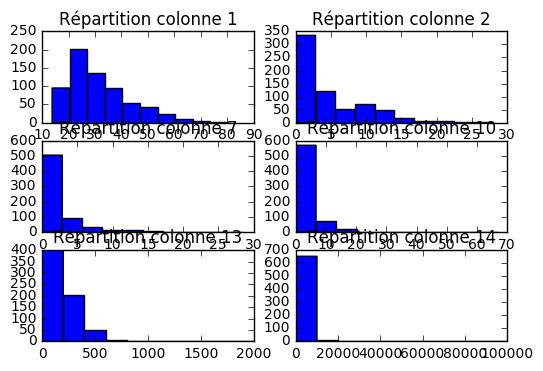

In [8]:
print(data_only_num_without_nan_array.shape)
print(data_only_num_without_nan_target.shape)

plt.figure(1)
plt.subplot(321)
plt.title('Répartition colonne 1')
plt.hist(data_only_num_without_nan_array[:,0])

plt.subplot(322)
plt.title('Répartition colonne 2')
plt.hist(data_only_num_without_nan_array[:,1])

plt.subplot(323)
plt.title('Répartition colonne 7')
plt.hist(data_only_num_without_nan_array[:,2])

plt.subplot(324)
plt.title('Répartition colonne 10')
plt.hist(data_only_num_without_nan_array[:,3])

plt.subplot(325)
plt.title('Répartition colonne 13')
plt.hist(data_only_num_without_nan_array[:,4])

plt.subplot(326)
plt.title('Répartition colonne 14')
plt.hist(data_only_num_without_nan_array[:,5])
plt.show()

<i>Faire des remarques sur la répartition de ces données, et peut être améliorer un peu les visuels</i>

On termine enfin la préparation des données, en binarisant la variable cible. On utilise la même idée que celle utilisée pour la transformation des <tt>?</tt> en <tt>nan</tt> auparavant. On remarquera également que nous forçons après le type des données de la table cible à <tt>int</tt> en réutilisant la commande <tt>astype</tt>.

In [8]:
data_only_num_without_nan_target[data_only_num_without_nan_target == '+'] = 1
data_only_num_without_nan_target[data_only_num_without_nan_target == '-'] = 0
data_only_num_without_nan_target = data_only_num_without_nan_target.astype(int)

Pour terminer sur cette phase exploratoire des données, nous allons regarder quelle est la répartition entre les exemples positifs et négatifs dans ces données.

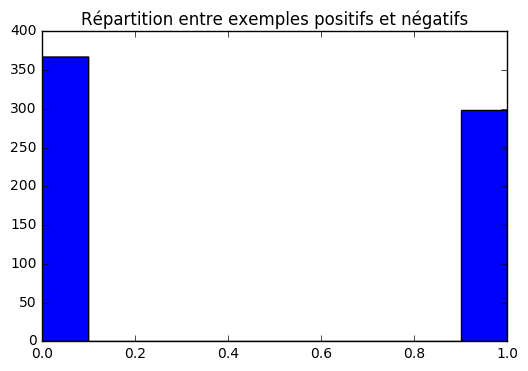

In [10]:
plt.figure(1)
plt.title('Répartition entre exemples positifs et négatifs')
plt.hist(data_only_num_without_nan_target[:])
plt.show()

On remarque que les données sont <i>globalement</i> équiréparties entre les classes positives et négatives. En particulier, ceci indique pour la suite que la mesure d'<i>accuracy</i> aura du sens pour l'étude de ces données.

Ceci conclut cette partie sur la préparation des données (numériques). Nous allons désormais utiliser ces données pour l'apprentissage.

<h3>Apprentissage et évaluation des modèles</h3>

Avant de débuter avec les modèles, nous allons donner des noms explicites aux variables cibles et explicatives :
<ul>
    <li><tt>X</tt> : le tableau de variables explicatives.</li>
    <li><tt>Y</tt> : le tableau de variables cibles.</li>
</ul>
On reprend ici simplement les tableaux précédemment remaniés, en leur donnant juste des noms plus parlant pour la suite...

In [7]:
X = data_only_num_without_nan_array
Y = data_only_num_without_nan_target

<h4>Définition de méthodes globales</h4>

Dans la suite, nous allons définir des méthodes et objets utilitaires pour la suite du sujet afin de faciliter l'application des différents algorithmes aux données.

Concernant nos méthodes utilitaires, nous commençons par définir un dictionnaire regroupant les algorithmes à appliquer. Ce dictionnaire comprend les algorithles suivants avec des paramètres par défaut :
<ul>
    <li><tt>RF</tt> : un algorithme de <i>Random Forest</i>. Deux paramètres seront utilisés pour les différents essais :
        <ul>
            <li><tt>n_estimators</tt> : Le nombre d'arbres générés et qui vont voter pour fournir le résultat final.</li>
            <li><tt>criterion</tt> : le critère utilisé pour le calcul du gain. Par défaut, ce dernier est <tt>gini</tt>, nous réaliserons également des essais avec <tt>entropy</tt>.</li>
        </ul>
    </li>
    <li><tt>KNN</tt> : application des K-Meilleurs Voisins, nous ferons uniquement varier le nombre de voisins. En regardant dans la documentation, on remarque également qu'il serait possible de faire varier la métrique utilisée (norme L1, L2, autre,...) ou encore l'algorithme de calcul. Cette méthode n'étant pas nécessairement celle fournissant les meilleurs résultats, mais étant une demandant un temps de calcul assez long, nous limiterons cependant le nombre d'essais d'où le fait de ne pas explorer toutes ces possibilités.</li>
    <li><tt>GaussianNB</tt> : application d'une méthode de Bayes naïve. Le seul argument possible serait celui de probabilités à priori, que nous n'avons pas utilisées ici.</li>
    <li><tt>DecisionTreeClassifier</tt> : utilisation d'arbres de décision. Nous ferons varier deux critères :
        <ul>
            <li><tt>criterion</tt> : le critère utilisé pour les calculs de gain, parmis <tt>gini</tt> (somme de probabilités au carré) et <tt>entropy</tt> (somme de logarithme des probabilités).</li>
            <li><tt>max_depth</tt> : la profondeur maximale de l'arbre utilisé, nous testerons une valeur finie, et l'arbre  complet.</li>
        </ul>
    </li>
    <li><tt>MLPClassifier</tt> : pour les réseaux de perceptrons multicouches, un grand nombre d'options sont disponibles dans la documentation, que ce soit sur la structure du réseau, les méthodes de calcul, la fonction d'activation,...En particulier, nous ne toucherons pas à la valeur par défaut de la fonction d'activation, que nous laisserons à <tt>relu</tt>. Ainsi, le seul paramètres sur lequel nous nous attarderons ici sera la structure du réseau via l'option <tt>hidden_layer_sizes</tt>.</li>
    <li><tt>GradientBoosting</tt> : pour des algorithmes additif qui fournissent des modèles par utilisation de la méthode <i>forward</i> en optimisant leur pente dans l'évolution de la vraissemblance des modèles. Nous ferons varier le nombre d'estimateurs. Les valeurs choisies sont assez importantes, mais il est précisé dans le documentation que ces méthodes sont assez robustes vis-à-vis du surapprentissage, ce ne devrait donc pas être un problème.</li>
    <li><tt>AdaBoost</tt> : nous conserverons les paramètres par défaut, à savoir que la méthode va estimer un arbre de décision sur les données, et l'améliorer par changements de valeurs pour les poids des instances mal classifiées.</li>
    <li><tt>SVM</tt> : nous testerons ici trois méthodes à base de SVM. Pour chacune d'entre elle, nous conserverons les valeurs par défaut (beaucoup de cas à traiter sinon...) :<ul>
        <li><tt>SVC</tt> : selon la documentation, pénalisation de l'erreur avec un paramètre <tt>C</tt>, d'où le nom de cet algorithme.</li>
        <li><tt>NuSVC</tt> : similaire à <tt>SVC</tt>, mais avec un paramètre pour contrôler le nombre de vecteurs de support.</li>
        <li><tt>LinearSVC</tt> : correspond à un <tt>SVC</tt> linéaire, mais avec plus de souplesse pour le calcul des pénalités. Selon la documentation, il s'accorde mieux aux ensembles de données volumineux.</li>
    </ul></li>
</ul>

In [4]:
clfs = {
    '00_RF_5_Gini': ensemble.RandomForestClassifier(n_estimators=5),
    '01_RF_50_Gini': ensemble.RandomForestClassifier(n_estimators=50),
    '02_RF_100_Gini': ensemble.RandomForestClassifier(n_estimators=100),
    '03_RF_5_Entropy': ensemble.RandomForestClassifier(n_estimators=5, criterion='entropy'),
    '04_RF_50_Entropy': ensemble.RandomForestClassifier(n_estimators=50, criterion='entropy'),
    '05_RF_100_Entropy': ensemble.RandomForestClassifier(n_estimators=100, criterion='entropy'),
    '06_KNN_10': neighbors.KNeighborsClassifier(n_neighbors=10),
    '07_KNN_5': neighbors.KNeighborsClassifier(n_neighbors=5),
    '08_Bayes': naive_bayes.GaussianNB(),
    '09_CART_full': tree.DecisionTreeClassifier(),
    '10_CART_5': tree.DecisionTreeClassifier(max_depth=5),
    '11_ID3_full': tree.DecisionTreeClassifier(criterion='entropy'),
    '12_ID3_5': tree.DecisionTreeClassifier(criterion='entropy', max_depth=5),
    '13_MPerceptron_10' : neural_network.MLPClassifier(hidden_layer_sizes = (10)),
    '14_MPerceptron_30' : neural_network.MLPClassifier(hidden_layer_sizes = (30)),
    '15_MPerceptron_10_10' : neural_network.MLPClassifier(hidden_layer_sizes = (10,10)),
    '16_GradientBoosting_25' : ensemble.GradientBoostingClassifier(n_estimators=25),
    '17_GradientBoosting_50' : ensemble.GradientBoostingClassifier(n_estimators=50),
    '18_AdaBoost' : ensemble.AdaBoostClassifier(),
    '19_SVM_SVC' : svm.SVC(),
    '20_SVM_NuSVC' : svm.NuSVC(),
    '21_SVM_LinearSVC' : svm.LinearSVC()
}

Après avoir définit ce dictionnaire, on continue en définissant la méthode qui appliquera nos algorithmes. Cette dernière prend trois arguments en paramètres :
<ul>
    <li><tt>clfs</tt> : le dictionnaire des algorithmes à tester.</li>


<li><tt>X</tt> : variables prédictives et leurs valeurs pour les individus de l'ensemble d'apprentissage.</li>
    <li><tt>Y</tt> : variable à prédire</li>
</ul>
Si on regarde plus en détails le code de cette fonction, on s'aperçoit que cette dernière prend en compte les différents éléments suivants :
<ul>
    <li><b>Cross-validation</b> : on utilise 10 plis pour cette validation croisée. Cette sélection de modèle est créée avec <tt>KFold</tt> du package <tt>model_selection</tt>, enregistrée dans la variable <tt>kf</tt> qui est ensuite réutilisée pour tous les tests à réaliser.</li>
    <li><b>Calcul d'estimateurs</b> : On calcule ensuite un certain nombre de résultats pour pouvoir évaluer les méthodes, à savoir :<ul>
        <li>Accuracy</li>
        <li>Rappel</li>
        <li>Précision</li>
        <li>AUC</li>
        <li>Temps d'exécution</li>
    </ul>
    Si tous ces indicateurs seront systématiquement calculés, ils ne seront cependant pas tout le temps pertinents, ceci sera au besoin indiqué au moment de l'exploitation des données.</li>
    <li><b>Stockage des résultats</b>Toutes les valeurs calculées sont stockées dans un tableau de valeur (<tt>results</tt>), où chaque ligne correspond aux mesures pour un modèle donné (<tt>result</tt> dans le code).</li>
</ul>

In [5]:
def run_classifiers(clfs, X, Y):
    results = {}
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        result = {}
        beginTime = time.time()
        
        try:
            result['cv_accuracy'] = model_selection.cross_val_score(clf, X, Y, cv=kf)
            result['cv_accuracy_mean'] = result['cv_accuracy'].mean()
            result['cv_accuracy_std'] = result['cv_accuracy'].std()

            result['cv_recall'] = model_selection.cross_val_score(clf, X, Y, cv=kf, scoring='recall')
            result['cv_recall_mean'] = result['cv_recall'].mean()
            result['cv_recall_std'] = result['cv_recall'].std()

            result['cv_precision'] = model_selection.cross_val_score(clf, X, Y, cv=kf, scoring='precision')
            result['cv_precision_mean'] = result['cv_precision'].mean()
            result['cv_precision_std'] = result['cv_precision'].std()

            result['cv_auc'] = model_selection.cross_val_score(clf, X, Y, cv=kf, scoring='roc_auc')
            result['cv_auc_mean'] = result['cv_auc'].mean()
            result['cv_auc_std'] = result['cv_auc'].std()

            result['elapsed_time'] = time.time() - beginTime
        except Exception: 
            result['cv_accuracy'] = result['cv_accuracy_mean'] = result['cv_accuracy_std'] = result['cv_recall'] = result['cv_recall_mean'] = result['cv_recall_std'] = result['cv_precision'] = result['cv_precision_mean'] = result['cv_precision_std'] = result['cv_auc'] = result['cv_auc_mean'] = result['cv_auc_std'] = result['elapsed_time'] = '-'
        results[i] = result
        
    return results

Cette dernière méthode utilitaires permet uniquement une mise en forme des résultats pour l'affichage. Elle prend donc en paramètre le tableau de résultats (<tt>results</tt>) de la méthode précédente (<tt>run_classifiers</tt>) et le remet en forme. Une solution aurait ici pu être de réaliser une mise en forme avec du texte, cependant, étant donné le nombre de méthodes testées, nous avons préféré avoir recours à un <tt>DataFrame</tt>, qui fournit un affichage plus visuel et optimisé avec Jupyter.

In [6]:
def prettyPrintResults(results):
    pretty_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'AUC', 'Time'])
    for clf in results:
        try:
            pretty_results.loc[clf] = ('%.3f'%(results[clf]['cv_accuracy_mean']) + ' ± ' + '%.3f'%(results[clf]['cv_accuracy_std']),
                                       '%.3f'%(results[clf]['cv_precision_mean']) + ' ± ' + '%.3f'%(results[clf]['cv_precision_std']),
                                       '%.3f'%(results[clf]['cv_recall_mean']) + ' ± ' + '%.3f'%(results[clf]['cv_recall_std']),
                                       '%.3f'%(results[clf]['cv_auc_mean']) + ' ± ' + '%.3f'%(results[clf]['cv_auc_std']),
                                       '%.3f'%(results[clf]['elapsed_time'])
                                      )
        except Exception:
            pretty_results.loc[clf] = ('-', '-', '-', '-', '-')
    return pretty_results.sort()

<h4>Application de nos méthodes globales aux données de l'exemple</h4>

Nous allons désormais pouvoir appliquer les différents algorithmes à notre cas particulier. Dans ce premier exemple, nous nous intéressons à l'attribution d'un crédit en fonction de différents paramètres. Concernant l'évaluation des erreurs, nous considérerons qu'il est plus grave d'accorder un crédit à quelqu'un qui ne le pouvait pas que de le refuser à quelqu'un qui le pouvait.

In [163]:
prettyPrintResults(run_classifiers(clfs, X, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_10_Gini,0.740 ± 0.056,0.715 ± 0.048,0.673 ± 0.052,0.817 ± 0.055,0.749
01_RF_50_Gini,0.788 ± 0.061,0.802 ± 0.040,0.697 ± 0.078,0.855 ± 0.043,9.493
02_RF_100_Gini,0.781 ± 0.049,0.800 ± 0.035,0.721 ± 0.064,0.845 ± 0.047,17.285
03_RF_10_Entropy,0.736 ± 0.053,0.742 ± 0.040,0.715 ± 0.098,0.817 ± 0.043,1.506
04_RF_50_Entropy,0.788 ± 0.052,0.805 ± 0.047,0.695 ± 0.080,0.841 ± 0.047,5.785
05_RF_100_Entropy,0.779 ± 0.052,0.802 ± 0.057,0.704 ± 0.067,0.849 ± 0.042,16.237
06_KNN_10,0.704 ± 0.055,0.756 ± 0.075,0.512 ± 0.051,0.745 ± 0.042,0.164
07_KNN_5,0.709 ± 0.039,0.712 ± 0.064,0.588 ± 0.051,0.733 ± 0.047,0.115
08_Bayes,0.716 ± 0.050,0.832 ± 0.052,0.467 ± 0.061,0.793 ± 0.058,0.136
09_CART_full,0.719 ± 0.037,0.687 ± 0.058,0.700 ± 0.092,0.719 ± 0.051,0.419


Commençons par commenter les résultats par familles de méthodes :
<ul>
    <li><b><tt>RF</tt></b> : On distingue deux comparaisons :
        <ul>
            <li><b>Nombre d'arbres :</b> Plus ce nombre est élevé, meilleurs sont les résultats en terme d'AUC (ceci est plus soumis à variations pour la lecture direct de l'accuracy, du rappel ou de la précision). On remarque cependant que les valeurs semblent converger vers des résultats optimaux (l'écart d'AUC entre 50 et 100 arbres et plus faible que celui entre 5 et 50 arbres), ce qui est cohérent avec le résultat vu en cours. Sans surprise non plus, plus on génère d'arbres, plus le temps de calcul est long (l'augmentation semble linéaire).</li>
            <li><b>Critère de calcul :</b> Sur cet exemple, il semblerait que le critère d'entropie soit moins adapté, en tendant vers une valeur d'AUC plus faible. De même, les valeurs des autres estimateurs sont globalement moins bonnes. Les temps de calculs sont eux comparables (un peu plus faibles avec l'entropie pour un faible nombre d'arbre, mais la différence doit venir d'arbres se terminant plus vite, cette différence s'effaçant quand le nombre d'arbres augmente).</li>
        </ul>
    </li>
    <li><b><tt>KNN</tt></b> : Les meilleurs résultats sont assez répartis entre les modèles. Dans la mesure où nous avions dit préférer des modèles où un "oui" était un "oui" sûr, il semblerait qu'ici avoir le plus de voisins semble le meilleur critère (c'est également ce cas qui fournit la meilleure AUC).</li>
    <li><b><tt>GaussianNB</tt> :</b> Les résultats obtenus sont intermédiaires entre Random Forest et KNN.</li>
    <li><b><tt>DecisionTreeClassifier</tt> :</b> On distingue deux comparaisons : 
        <ul>
            <li><b>Profondeur de l'arbre : </b>Les modèles où une profondeur est forcée semblent meilleurs (moins de sur-apprentissage?) sur tous les critères mis à part le rappel. Comme la précision était notre critère le plus mis en avant, on préfèrera donc ces modèles à ceux complets.</li>
            <li><b>Critère de calcul : </b>Pour cet exemple, le critère Gini obtient de meilleurs résultats pour nos indicateurs.</li>
        </ul>
    </li>
    <li><b><tt>MLPClassifier</tt> :</b> Les résultats sont ici moins bon que les autres méthodes, on remarquera sur nos exemples que les modèles avec un nombre plus faible de perceptrons semblent avoir les meilleurs résultats.</li>
    <li><b><tt>GradientBoosting</tt> :</b> Les résultats sont comparables pour les deux valeurs testées, par contre ils font partis des meilleurs résultats sur ces données. On remarquera en particulier qu'ils fournissent des résultats comparables aux Random Forest, mais pour des temps de calculs bien plus faibles!</li>
    <li><b><tt>AdaBoost</tt> :</b> Les résultats sont un petit peu en deça des meilleurs Random Forest (ou Gradient Boosting), mais restent très convenables, surtout pour leur temps de calcul (comparé aux Random Forest).</li>
    <li><b><tt>SVM</tt> :</b> Les résultats sont comparables pour les trois méthodes testées et peu adaptés à nos données ici.</li>
</ul>

En conclusion sur cet exemple, les méthodes avec les <b>meilleurs résultats</b> sont <b>Random Forest</b> (avec critère de Gini et nombre d'arbres important), ainsi que <b>Gradient Boosting</b> (en terme de rappel, il s'agit des meilleures méthodes, et leur temps de calcul est un aspect important ici). Au contraire, celles qui semblent le <b>moins performantes</b> sont les <b>SVM</b> et les <b>perceptrons multicouches</b>.


<h3>Normalisation des variables continues</h3>

Comme cela est suggéré dans l'énoncé, nous continuons en normalisant les variables continues, ce qui devrait permettre à certains algorithmes d'être plus performants. On utilise pour cela une librairie de preprocessing nommée <kbd>StandardScaler</kbd>.

In [16]:
stdScaler = preprocessing.StandardScaler()
X_stdScaled = stdScaler.fit_transform(X)
prettyPrintResults(run_classifiers(clfs, X_stdScaled, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.763 ± 0.059,0.752 ± 0.047,0.676 ± 0.119,0.821 ± 0.038,1.406
01_RF_50_Gini,0.796 ± 0.062,0.805 ± 0.063,0.703 ± 0.081,0.846 ± 0.045,11.751
02_RF_100_Gini,0.784 ± 0.060,0.793 ± 0.044,0.709 ± 0.063,0.848 ± 0.044,22.845
03_RF_5_Entropy,0.758 ± 0.045,0.743 ± 0.071,0.685 ± 0.093,0.795 ± 0.044,1.500
04_RF_50_Entropy,0.785 ± 0.045,0.803 ± 0.068,0.702 ± 0.092,0.845 ± 0.044,12.657
05_RF_100_Entropy,0.791 ± 0.066,0.808 ± 0.051,0.716 ± 0.072,0.846 ± 0.040,24.761
06_KNN_10,0.737 ± 0.056,0.822 ± 0.052,0.538 ± 0.098,0.818 ± 0.046,0.297
07_KNN_5,0.745 ± 0.062,0.790 ± 0.096,0.605 ± 0.094,0.808 ± 0.049,0.313
08_Bayes,0.716 ± 0.050,0.832 ± 0.052,0.467 ± 0.061,0.793 ± 0.058,0.188
09_CART_full,0.724 ± 0.048,0.692 ± 0.051,0.692 ± 0.088,0.708 ± 0.048,0.344


En comparant ces résultats à ceux obtenus sans prétraitement sur ces données, nous pouvons voir que les algorithmes suivants voient leurs performances améliorées significativement :
<ul>
    <li>Les Random Forest avec peu d'arbres générés (ceux qui moyennaient le moins le erreurs en fait).</li>
    <li>KNN</li>
    <li>Les modèles à perceptrons multicouches (+0.1/0.2 en accuracy!), ceci semble cohérent étant donné le fait qu'ils ajustent des coefficients pour prendre une décision via le signe. Ainsi, en normalisant ce dernier, on aide leur travail.</li>
    <li>Les SVM, pour des raisons qui doivent être similaires aux réseaux de perceptrons.</li>
</ul>
Quoiqu'il en soit, la meilleure méthode reste ici le Gradient Boosting, mais les réseaux de perceptrons peuvent ici devenir de bons concurrents.

Dans un second temps, nous réalisons les mêmes tests avec cette fois-ci le module <kbd>MinMaxClassifier</kbd>. On pourra comparer vis-à-vis d'un simple recentrage des données.

In [18]:
minMaxScaler = preprocessing.MinMaxScaler()
X_minMaxScaled = minMaxScaler.fit_transform(X)
prettyPrintResults(run_classifiers(clfs, X_minMaxScaled, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.766 ± 0.041,0.753 ± 0.055,0.666 ± 0.087,0.815 ± 0.047,1.297
01_RF_50_Gini,0.784 ± 0.054,0.793 ± 0.033,0.710 ± 0.090,0.845 ± 0.044,9.516
02_RF_100_Gini,0.781 ± 0.056,0.800 ± 0.045,0.706 ± 0.087,0.846 ± 0.047,21.689
03_RF_5_Entropy,0.757 ± 0.048,0.705 ± 0.047,0.696 ± 0.075,0.806 ± 0.056,1.438
04_RF_50_Entropy,0.793 ± 0.055,0.786 ± 0.048,0.702 ± 0.097,0.846 ± 0.044,13.391
05_RF_100_Entropy,0.778 ± 0.054,0.810 ± 0.044,0.704 ± 0.072,0.852 ± 0.040,27.386
06_KNN_10,0.728 ± 0.070,0.823 ± 0.082,0.515 ± 0.119,0.799 ± 0.073,0.328
07_KNN_5,0.737 ± 0.070,0.768 ± 0.109,0.607 ± 0.098,0.799 ± 0.073,0.328
08_Bayes,0.716 ± 0.050,0.832 ± 0.052,0.467 ± 0.061,0.793 ± 0.058,0.172
09_CART_full,0.713 ± 0.042,0.695 ± 0.035,0.692 ± 0.095,0.710 ± 0.050,0.344


Les résultats sont ici similaires à ceux obtenus par centrage autours de 0 des données. On remarque même que les améliorations sont un peu moins marquées. Dans la suite, nous ne considèrerons donc que le centrage à 0 des données.


<h3>Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales</h3>

Nous allons désormais regarder l'utilisation de l'ACP. Dans le sujet, il est demandé de réaliser cette dernière et de conserver les <i>k</i> premières variables pour qu'elles expliquent au moins 70% de la variance totale. Après différentes exécution du code qui suit, nous avons déterminé que garder les <b>cinq premières variables de l'ACP</b> permettait de conserver <b>79% de la variance totale</b>. En conservant ces cinq première variables, nous pouvons alors relancer notre modélisation et comparer la qualité des modèles obtenus avec celles des modèles obtenus précédemment.

In [19]:
pca = decomposition.PCA()
pca.fit(X_stdScaled)
X_PCA_all = pca.transform(X_stdScaled)
print('Variance ratio pour les cinq premières variables de l\'ACP : {}'.format(sum(pca.explained_variance_ratio_[0:4])))
X_PCA = X_PCA_all[:,range(0,5)]

Variance ratio pour les cinq premières variables de l'ACP : 0.7960644019095082


On regarde ensuite les modèles obtenus avec uniquement les variables issues de l'ACP.

In [20]:
prettyPrintResults(run_classifiers(clfs, X_PCA, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.730 ± 0.054,0.711 ± 0.045,0.678 ± 0.087,0.766 ± 0.049,1.422
01_RF_50_Gini,0.743 ± 0.054,0.743 ± 0.044,0.672 ± 0.101,0.816 ± 0.037,13.360
02_RF_100_Gini,0.745 ± 0.047,0.752 ± 0.056,0.656 ± 0.093,0.812 ± 0.046,25.376
03_RF_5_Entropy,0.706 ± 0.060,0.718 ± 0.080,0.662 ± 0.080,0.775 ± 0.059,2.059
04_RF_50_Entropy,0.752 ± 0.052,0.739 ± 0.062,0.680 ± 0.067,0.822 ± 0.041,15.556
05_RF_100_Entropy,0.748 ± 0.047,0.747 ± 0.048,0.657 ± 0.088,0.810 ± 0.043,34.250
06_KNN_10,0.745 ± 0.060,0.821 ± 0.072,0.566 ± 0.093,0.816 ± 0.043,0.475
07_KNN_5,0.760 ± 0.043,0.788 ± 0.067,0.649 ± 0.073,0.800 ± 0.036,0.328
08_Bayes,0.677 ± 0.064,0.746 ± 0.107,0.424 ± 0.091,0.769 ± 0.064,0.202
09_CART_full,0.689 ± 0.066,0.667 ± 0.051,0.639 ± 0.096,0.690 ± 0.061,0.468


Sur ce premier essai, on remarque deux familles de modèles :
<ul>
    <li><b>L'ACP a amélioré les performances : </b>KNN, Perceptrons multicouches, SVM</li>
    <li><b>L'ACP a dégradé les performances : </b>Random Forest, Naïve Bayes, CART, ID3, Gradient Boosting, Adaboost</li>
</ul>
On remarque que les modèles qui sont favorisés par cette méthode sont ceux qui avait déjà le plus bénéficié d'une normalisation des données. En particulier, ce sont des modèles qui vont chercher à mettre en avant les principales variables explicatives, nous les avons donc aidé dans leur démarche en leur pré-sélectionnant les meilleurs variables. Par exemple, dans le cas des réseaux de perceptrons multicouches, l'idée est de mettre à jour des poids pour les différents paramètres. En pré-sélectionnant les variables qui expliquent le plus d'information, on aide ainsi le réseau à ne pas se perdre, et à biaiser son résultat en ajoutant des coefficients à des variables pas ou peu importantes. Or, comme on additionne des contributions, on évite ainsi des biais inutiles, d'où des meilleurs résultats.

À l'inverse, pour des méthodes comme CART, ID3 ou les Random Forest, pré-sélectionner des données les "empêchent" d'effectuer les sélection qu'ils font proprement naturellement, et surout les empêche d'affiner les résultats autant qu'ils le pourraient, d'où des performances un peu en deça de celles observées initiallement.


Puis on regade les modèles obtenus en concaténant à ces dernières les variables issues de la normalisation (centrage à zéro uniquement) de l'étape précédente.

In [21]:
prettyPrintResults(run_classifiers(clfs, np.concatenate((X_stdScaled, X_PCA), axis=1), Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.749 ± 0.043,0.732 ± 0.042,0.689 ± 0.063,0.799 ± 0.054,1.422
01_RF_50_Gini,0.776 ± 0.041,0.770 ± 0.051,0.678 ± 0.089,0.846 ± 0.040,13.985
02_RF_100_Gini,0.770 ± 0.053,0.802 ± 0.067,0.697 ± 0.073,0.841 ± 0.046,25.340
03_RF_5_Entropy,0.754 ± 0.069,0.730 ± 0.060,0.718 ± 0.094,0.801 ± 0.050,1.976
04_RF_50_Entropy,0.784 ± 0.050,0.803 ± 0.057,0.676 ± 0.080,0.845 ± 0.044,16.698
05_RF_100_Entropy,0.785 ± 0.066,0.792 ± 0.066,0.702 ± 0.089,0.849 ± 0.039,28.403
06_KNN_10,0.739 ± 0.055,0.836 ± 0.051,0.532 ± 0.096,0.817 ± 0.044,0.400
07_KNN_5,0.737 ± 0.053,0.779 ± 0.088,0.594 ± 0.083,0.799 ± 0.048,0.452
08_Bayes,0.707 ± 0.047,0.796 ± 0.056,0.471 ± 0.065,0.797 ± 0.059,0.161
09_CART_full,0.706 ± 0.049,0.675 ± 0.053,0.656 ± 0.099,0.692 ± 0.051,0.556


La conjonction de l'utilisation de l'ACP avec des données centrées autours de 0 permet d'obtenir des résultats bien meilleurs qu'en prenant les deux méthodes séparément. En particulier, les pertes de performances observées sur les modèles avec uniquement l'ACP sont soit annulées (Gradient Boosting, Random Forest), soit fortement diminuées (CART et Id3). 

Dans le cas particulier des réseaux de perceptrons multicouches, du Gradient Boosting et des SVM, on remarque même des performances supérieures à celles observées jusqu'ici. Ainsi, on obtient une de nos meilleures accuracy ici avec le Gradient Boosting avec 50 estimateurs (accuracy > 0.8 et AUC = 0.85).

L'utilisation de ces deux méthodes conjointes est donc un outil intéressant pour l'exploitation de ces données.


<h3>Création de nouvelles variables caractéristiques par combinaisons non linéaire des variables initiales</h3>

Pour terminer avec l'étude des données uniquement numériques, nous allons regarder l'influence de l'utilisation de <kbd>PolynomialFeatures</kbd>. Nous ajoutons ainsi de la complexité aux variables avant de réajuster nos modèles sur ces variables. Une fois ces variables créées, on estime à nouveau nos modèles pour voir les évolutions.

In [22]:
pf = preprocessing.PolynomialFeatures()
X_PF = pf.fit_transform(X_stdScaled)
prettyPrintResults(run_classifiers(clfs, X_PF, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.727 ± 0.039,0.721 ± 0.059,0.690 ± 0.108,0.797 ± 0.049,1.750
01_RF_50_Gini,0.776 ± 0.065,0.779 ± 0.066,0.698 ± 0.085,0.834 ± 0.049,14.079
02_RF_100_Gini,0.757 ± 0.058,0.782 ± 0.049,0.716 ± 0.085,0.843 ± 0.049,27.814
03_RF_5_Entropy,0.751 ± 0.061,0.733 ± 0.066,0.678 ± 0.070,0.803 ± 0.086,2.400
04_RF_50_Entropy,0.767 ± 0.062,0.789 ± 0.075,0.699 ± 0.100,0.840 ± 0.051,20.020
05_RF_100_Entropy,0.781 ± 0.055,0.794 ± 0.083,0.704 ± 0.081,0.840 ± 0.048,40.399
06_KNN_10,0.740 ± 0.051,0.846 ± 0.037,0.524 ± 0.090,0.812 ± 0.043,0.578
07_KNN_5,0.727 ± 0.061,0.752 ± 0.070,0.593 ± 0.086,0.803 ± 0.047,0.484
08_Bayes,0.665 ± 0.046,0.809 ± 0.097,0.332 ± 0.071,0.756 ± 0.075,0.188
09_CART_full,0.698 ± 0.043,0.666 ± 0.044,0.703 ± 0.080,0.696 ± 0.046,1.177


Les conclusions sont ici assez similaires à celles précédentes. Ainsi, les modèles obtenus avec KNN, les réseaux de perceptrons multicouches et les SVM voient leurs performances améliorées par ce pré-traitement. On remarquera cependant qu'ici les méthodes Gradient Boosting et AdaBoost ne voient pas de changement majeur dans leurs performances, à la différences des méthodes restantes.

On retrouve une fois encore le fait que les méthodes donnant de l'importance à la forme/répartition des données (perceptrons) ou à leur positionnement dans l'espace (SVM, KNN) obtiennent de meilleures performances avec ces pré-traitements.

## Données manquantes et non numériques

Maintenant que nous nous sommes un peu familiarisés avec nos différentes méthodes dans le cas des données numériques sans données manquantes, nous pouvons continuer les phases de pré-traitement pour gérer le cas des données manquantes. Nous allons également ajouter les données non numériques à notre apprentissage.


<h3>Traitement des données manquantes</h3>

Dans un premier temps, occupons-nous des données manquantes. On commence par numériser les colonnes contenant des attributs non numériques, afin de pouvoir traiter ultérieurement leurs données manquantes comme s'il s'agissait de variables numériques. Pour cela, on utilise <tt>np.unique</tt> pour remplacer chaque données non numériques par son premier indice d'apparition dans la colonne de la variable.
On obtient ainsi dans <tt>X_cat</tt> une transcription des colonnes non numériques en colonnes numériques, avec des <tt>nan</tt> pour les données manquantes.

Cette action est motivée par le fait que l'<tt>Imputer</tt> que l'on utilise ne considère que des <tt>float</tt>, il nous faut donc avoir uniquement des données numériques pour ce pré-traitement.

In [10]:
col_cat = [0, 3, 4, 5, 6, 8, 9, 11, 12]
X_cat = data_array[:, col_cat]
for col_id in range(0,len(col_cat)):
    col = X_cat[:, col_id]
    col[col != '?']
    unique_val, val_idx = np.unique(col[col != '?'], return_inverse=True)
    col[col != '?'] = val_idx
    col[col == '?'] = np.nan
    X_cat[:, col_id] = col

On récupère ensuite les données numériques déjà pré-traitées lors de la partie précédente.

In [11]:
X_num = data_only_num_array

On traite alors les données numériques (vecteur <tt>X_num</tt>), en utilisant la stratégie <i>mean</i> pour les données manquantes.

In [12]:
num_imputer = preprocessing.Imputer(strategy='mean')
X_num_imputed = num_imputer.fit_transform(X_num)

Ensuite, on traite alors les données catégorielles (vecteur <tt>X_cat</tt>), en utilisant la stratégie <i>most_frequent</i> pour les données manquantes.

In [13]:
cat_imputer = preprocessing.Imputer(strategy='most_frequent')
X_cat_imputed = cat_imputer.fit_transform(X_cat)

Nous avons donc désormais traité toutes les données manquantes dans notre jeu de données initial.


<h3>Traitement des variables catégorielles</h3>

Désormais, nous allons nous occuper des variables catégorielles. Pour ces dernières, il était demandé de les "découper" en autant de variables que de modalités. Ainsi, pour une variable X à trois modalités a, b et c, on créé trois variables A, B et C. Ces nouvelles variables auront respectivement pour valeur <tt>True</tt> si X vaut respectivement a, b ou c et <tt>False</tt> sinon.

Ceci est directement implémenté en Python avec le package <tt>OneHotEncoder</tt>, son application est donc immédiate. Dans la mesure où le pré-traitement pour remplacer les données manquantes a déjà été effectué, nous réutilisons donc son résultat (<tt>X_cat_imputed</tt>) en entré de cet encodeur.

In [14]:
oneHotEncoder = preprocessing.OneHotEncoder()
X_cat_oneHotEncoded = oneHotEncoder.fit_transform(X_cat_imputed).toarray()

Ainsi, nous avons désormais pré-traité toutes nos données. Il nous faut alors construire notre jeu de données à utiliser à partir des différents échantillons pré-traités.


<h3>Construction de votre jeu de données</h3>

Nous commençons par renormaliser les données numériques comme nous l'avions fait à la partie précédente.

In [15]:
stdScaler = preprocessing.StandardScaler()
X_num_stdScaled = stdScaler.fit_transform(X_num_imputed)

Nous construisons ensuite notre jeu de données, en utilisant comme données :
<ul>
    <li>Les données numériques normalisées (<tt>X_num_stdScaled</tt>)</li>
    <li>Les données catégorielles transformées (<tt>X_cat_oneHotEncoded</tt>)</li>
    <li>Les données issues de l'ACP (<tt>X_PCA_final</tt>). Comme l'ACP initiale ne prenait pas en compte les données manquantes, nous recommençons une ACP en gardant ici aussi au moins 70% de l'information. Avec toutes les données, ceci demande de garder 7 variables.</li>
</ul>
L'ensemble des ces données est stocké dans un vecteur nommé <tt>X_all</tt>.

In [17]:
# Toutes les données numériques et catégorielles
X_v1 = np.concatenate((X_num_stdScaled, X_cat_oneHotEncoded), axis=1)

# Combinaisons non linéaires avec les données manquantes uniquement sur les données numériques
#X_PF_final = pf.fit_transform(X_num_StdScaled)

# ACP avec les données manquantes
pca = decomposition.PCA()
pca.fit(X_v1)
X_PCA_final_all = pca.transform(X_v1)
print('Variance ratio pour les sept premières variables de l\'ACP : {}'.format(sum(pca.explained_variance_ratio_[0:7])))
X_PCA_final = X_PCA_final_all[:,range(0,6)]

# Concaténation pour obtenir notre vecteur de données
X_all = np.concatenate((X_num_stdScaled, X_cat_oneHotEncoded, X_PCA_final), axis=1)
X_all.shape

Variance ratio pour les sept premières variables de l'ACP : 0.7050825443445978


(688, 52)

Pour terminer, la sélection de variable qui sera exécutée serait biaisée si elle était réalisée sur le même ensemble que l'apprentissage. Ainsi, nous allons terminer la préparation de ce jeu de données par la création de deux ensembles, un pour les données utiles à la sélection de variable (disons 20% des données) et un autre pour l'apprentissage (dison 80% des données).

In [130]:
mask = np.random.rand(len(X_all)) < 0.8
X_all_test = X_all[mask]
X_all_select = X_all[~mask]

Pour finir, comme précédemment, on binarise également la variable de décision <tt>Y</tt> qui est associée à des entiers.

In [132]:
Y = data_target.copy()
Y[Y == '+'] = 1
Y[Y == '-'] = 0
Y = Y.astype(int)
Y_test = Y[mask]
Y_select = Y[~mask]

Après cette phase de construction du jeu de données, on observe que l'on dispose de beaucoup (trop) de données, en particulier par l'ajout de combinaisons non linéaires. Une étape de sélection de variables est alors nécessaire pour apprendre un modèle raisonnable.

<h3>Sélection de variables</h3>

<h4>Utilisation de <tt>SelectKBeast</tt></h4>

Pour la sélection de variables, nous débuterons par l'utilisation de la méthode <tt>SelectKBest</tt>. La mesure prise sera celle de l'information mutuelle entre les variables. Une fois cette méthode appliquée, on obtiendra un nouveau vecteur de paramètres <tt>X_KBest</tt> contenant les variables les plus pertinentes pour ce critère.

Concernant le nombre de variables à conserver, la seconde ACP nous indiquait 7 variables pour conserver 70% de l'information. Ainsi, la valeur par défaut de <tt>SelectKBest</tt> (10) semble réaliste. Nous ne forcerons donc pas ici un nombre de variables à sélectionner.

Après sélection on trouve donc de manière "logique" que nous avons 10 variables conservées.

In [133]:
selector = feature_selection.SelectKBest(feature_selection.mutual_info_classif)
selector.fit_transform(X_all_select, Y_select)
X_KBest = selector.transform(X_all_select)
KBest_scores = selector.scores_
X_KBest.shape

(126, 10)

In [168]:
KBest_values = np.sort(KBest_scores)[::-1][0:10]
KBest_indexes = []

for i in range(0, len(KBest_values)):
    KBest_indexes.append(np.where(KBest_scores == KBest_values[i]))

KBest_indexes = np.asarray(KBest_indexes).reshape([1,-1])[0]

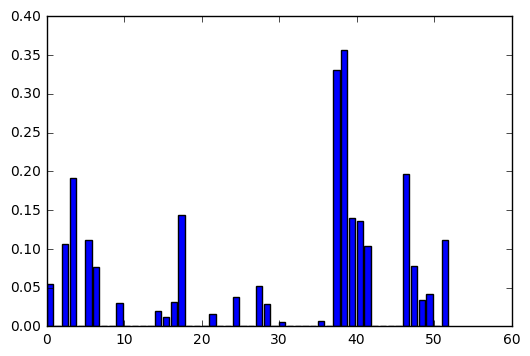

In [141]:
plt.bar(np.arange(KBest_scores.size), height=KBest_scores)
plt.show()

Sur ce graphe, on voit qu'une poignée assez faible de variables semble se détacher du reste du point de vue du score. Ainsi, si la seconde ACP nous encourageait à garder sept variables, on retrouve ceci ici avec entre 5 et 7 variables qui se détachent réellement.

La valeur par défaut de 10 variables conservées est donc possible, mais peut être un peu trop élevée.

Quoiqu'il en soit, nous disposons désormais de notre variables sélectionnées, il ne nous reste plus qu'à trouver nos modèles en utilisant ces variables.

In [144]:
prettyPrintResults(run_classifiers(clfs, X_all_test[:,KBest_indexes], Y_test))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.820 ± 0.045,0.797 ± 0.074,0.822 ± 0.042,0.883 ± 0.049,1.234
01_RF_50_Gini,0.829 ± 0.045,0.834 ± 0.067,0.831 ± 0.056,0.902 ± 0.049,10.641
02_RF_100_Gini,0.850 ± 0.041,0.814 ± 0.072,0.836 ± 0.048,0.905 ± 0.045,21.001
03_RF_5_Entropy,0.836 ± 0.052,0.827 ± 0.073,0.830 ± 0.069,0.882 ± 0.037,1.313
04_RF_50_Entropy,0.851 ± 0.040,0.808 ± 0.075,0.834 ± 0.076,0.904 ± 0.045,10.188
05_RF_100_Entropy,0.833 ± 0.039,0.808 ± 0.075,0.833 ± 0.054,0.909 ± 0.043,22.189
06_KNN_10,0.833 ± 0.038,0.815 ± 0.059,0.815 ± 0.050,0.904 ± 0.039,0.313
07_KNN_5,0.833 ± 0.050,0.813 ± 0.073,0.819 ± 0.038,0.888 ± 0.046,0.375
08_Bayes,0.838 ± 0.033,0.872 ± 0.044,0.756 ± 0.048,0.901 ± 0.041,0.172
09_CART_full,0.760 ± 0.054,0.721 ± 0.066,0.743 ± 0.085,0.767 ± 0.047,0.391


Les résultats obtenus sont alors sans exception bien meilleurs que tous les résultats obtenus précédemment, avec pour presque toutes les méthodes des accuracy supérieurs à 0,8! De même, la plupart des valeurs d'AUC sont désormais générallement au-dessus ou proches des 0,9. Il en va enfin de même pour la précision (qui était notre critère de choix pour ce problème).

En particulier, suite à cette sélection de variables, les méthodes fournissant les meilleurs résultats sont : Random Forest ; les réseaux de perceptrons multicouches et les SVM. Pour chacune des ces méthodes, on observe : 
<ul>
    <li><b>Accuracy :</b> Environ 0,85 (mieux que tout les essais précédents)</li>
    <li><b>Precision :</b> 0,83 > . > 0,78 (même remarque)</li>
    <li><b>Rappel :</b> 0,93 > . > 0,83 (même remarque et de loin)</li>
    <li><b>AUC :</b> 0,93 > . > 0,90 (même remarque et de loin)</li>
</ul>
Le modèle qui semble avoir été le plus performant ici (meilleur compromis dans les valeurs) est le réseaux de perceptrons <tt>15_MPerceptron_10_10</tt>.


<h4>Sélection avec <tt>RandomForest</tt></h4>

Essayons alors une autre sélection de variables en utilisant désormais l'algorithme Random Forest. En effet, ce dernier permet de calculer l'importance des différentes variables proposées, et ainsi de sélectionner celles ayant le plus d'importance. Afin de pouvoir comparer avec les résultats précédents, nous reprendrons le même jeu de données <tt>X_all</tt>.

Nous commençons par appliquer l'algorithme de Random Forest sur nos données, et afficher l'importance calculée pour les différentes variables.

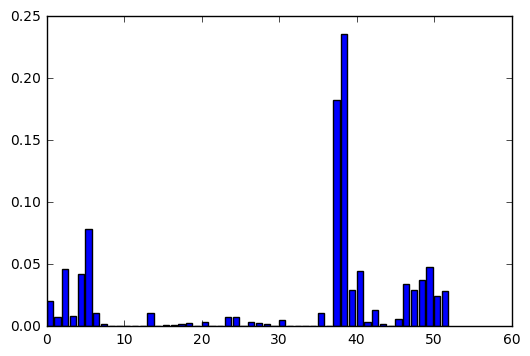

In [146]:
rf = ensemble.RandomForestClassifier()
X_RF = rf.fit(X_all_select, Y_select)
RF_scores = X_RF.feature_importances_
plt.bar(np.arange(RF_scores.size), height=RF_scores)
plt.show()

Il est intéressant ici de comparer ce résultat avec le graphe obtenu de scores obtenu précédemment. On observe alors que Random Forest fournit un résultat plus tranché sur les variables à conserver. Ainsi, on remarque que moins de variables sont mises en avant, et avec ce critère, la sélection des 10 meilleures variables pourrait <b>presque</b> être vue comme excessive dans la mesure où 3 variables se démarquent fortement puis sept autres, mais à des niveaux bien moins conséquents.

Nous considérerons tout de même que conserver les dix meilleures variables revient à conserver toutes les variables avec une informations supérieure ou égale à 0,05, ce qui sur cet histogramme semble bien être les principales variables à considérer.

In [167]:
RF_best_values = np.sort(RF_scores)[::-1][0:10]
RF_best_indexes = []

for i in range(0, len(RF_best_values)):
    RF_best_indexes.append(np.where(RF_scores == RF_best_values[i]))

RF_best_indexes = np.asarray(RF_best_indexes).reshape([1,-1])[0]

Maintenant que ces variables sont sélectionnées, nous pouvons passer à l'estimation des modèles avec ces variables.

In [149]:
prettyPrintResults(run_classifiers(clfs, X_all_test[:,RF_best_indexes], Y_test))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.840 ± 0.051,0.816 ± 0.082,0.833 ± 0.062,0.886 ± 0.041,1.344
01_RF_50_Gini,0.854 ± 0.044,0.852 ± 0.075,0.833 ± 0.070,0.918 ± 0.045,9.391
02_RF_100_Gini,0.858 ± 0.053,0.836 ± 0.065,0.848 ± 0.060,0.919 ± 0.042,21.126
03_RF_5_Entropy,0.840 ± 0.072,0.822 ± 0.077,0.827 ± 0.058,0.883 ± 0.058,1.563
04_RF_50_Entropy,0.847 ± 0.058,0.836 ± 0.082,0.826 ± 0.050,0.920 ± 0.040,12.110
05_RF_100_Entropy,0.852 ± 0.057,0.848 ± 0.074,0.830 ± 0.070,0.921 ± 0.043,22.814
06_KNN_10,0.854 ± 0.044,0.853 ± 0.079,0.818 ± 0.042,0.906 ± 0.053,0.328
07_KNN_5,0.842 ± 0.050,0.831 ± 0.084,0.820 ± 0.034,0.898 ± 0.053,0.313
08_Bayes,0.847 ± 0.034,0.875 ± 0.054,0.775 ± 0.043,0.903 ± 0.042,0.219
09_CART_full,0.790 ± 0.029,0.767 ± 0.055,0.801 ± 0.096,0.792 ± 0.033,0.391


En comparant les résultats obtenus à ceux que nous avions eu avec la méthode <tt>SelectKBest</tt>, on observe que pour la plupart des algorithmes, les résultats sont généralement un peu meilleurs (mais cela n'est pas exemple pas le cas pour Gradient Boosting). Pour les situations où les résultats sont améliorés, on note des hausses d'accuracy de l'ordre de 0,02, de même pour l'AUC ou la précision.

On remarque donc ici toute l'importance des algorithmes de Random Forest, qui permettent à la fois d'obtenir de bons modèles robustes, mais également de faire une sélection de variables efficace.

Pour conclure sur cette sélection de variable, comparons les variables qui ont été conservées par les deux méthodes.

In [169]:
print('Comparaison des meilleures valeurs triées')
print('    10 meilleures variables d\'après SelectKBeast  {}'.format(np.sort(KBest_indexes)))
print('    10 meilleures variables d\'après Random Forest {}'.format(np.sort(RF_best_indexes)))

print('\n\nComparaison des meilleures valeurs par ordre d\'importance')
print('    10 meilleures variables d\'après SelectKBeast  {}'.format(KBest_indexes))
print('    10 meilleures variables d\'après Random Forest {}'.format(RF_best_indexes))

Comparaison des meilleures valeurs triées
    10 meilleures variables d'après SelectKBeast  [ 2  3  5 17 37 38 39 40 46 51]
    10 meilleures variables d'après Random Forest [ 2  4  5 37 38 39 40 46 48 49]


Comparaison des meilleures valeurs par ordre d'importance
    10 meilleures variables d'après SelectKBeast  [38 37 46  3 17 39 40  5 51  2]
    10 meilleures variables d'après Random Forest [38 37  5 49  2 40  4 48 46 39]


On remarque que les deux méthodes partagent 70% des variables sélectionnées. De même, ces deux méthode détectent les même deux variables principales très nettement. Par contre l'ordre des variables qui suit varie grandement en fonction de la méthode (regarder par exemple la variable <tt>46</tt> entre les deux modèles).


<h2>Résumé de cette première approche</h2>

Nous avons pu découvrir ici les principales caractéristiques des algorithmes essentiels en machines learning. Outre la découverte de ces algorithmes, cette partie nous a permis de nous familiariser avec le pré-traitement des données, étapes importante sans laquelle aucun modèle de qualité ne peut être obtenu.

Enfin, nous avons également abordé ici la question de la préparation d'un jeu de données complets, en utilisant des enrichissements de données suivis par une sélection de variables à l'aide de méthodes comme <tt>SelectKBest</tt> ou l'utilisation des Random Forest et leur mesure de l'importance des variables. Nous avons ainsi vu que les traitements visant à recentrer ou normaliser les données permettent des améliorations significatives sur les algorithmes se fondant sur la disposition spatialle des données comme KNN ou les SVM.

# II. Apprentissage supervisé sur des données textuelles : Feature engineering et classification

Avant de démarrer tout test avec cette base de données, nous allons commencer par regarder l'aspect des données fournies (en particulier leur répartition spam/ham), afin de savoir quel(s) indicateur(s) sont les plus recommandés.

Nous commençons ainsi comme pour la partie précédente par lire les données à partir du fichier CSV. Ensuite, nous binarisons la variable de décision pour qu'elle soit correctement interprétée pour les différentes méthodes.

In [2]:
sms_data = pd.read_csv('SMSSpamCollection.data', '\t', header=None)
messages = sms_data.values[:,1]

In [3]:
Y = sms_data.values[:,0]
Y[Y == 'ham'] = 1
Y[Y == 'spam'] = 0
Y = Y.astype(int)

Désormais, nous pouvons regarder la répartition des données entre les deux possibilités pour avoir une meilleure idée de ces dernières. On remarque alors de manière nette que le nombre de données où la variable cible vaut 1 (<i>ham</i>) est très nettement supérieur à celui où elle vaut 0 (<i>spam</i>). La répartition est ainsi de l'ordre de 87% - 13%.

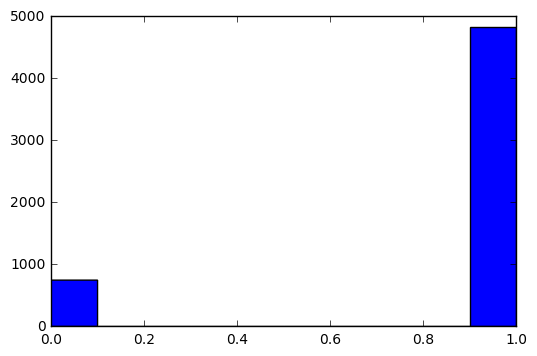

In [178]:
plt.hist(Y)
plt.show()

En conclusion de cette étude préliminaire, nous pouvons donc avancer qu'il n'est pas raisonnable de prendre l'accuracy comme mesure pour évaluer les modèles ici. En effet, un modèle qui dirait "toujours 1", aurait ici une accuracy de 87%...Ce qui laisse peu de marge pour tester la qualité des modèles. Ainsi, deux solutions s'offrent à nous ici :
<ul>
    <li>Utiliser d'autres critères, en particulier l'AUC</li>
    <li>Changer le calcul de l'accuracy pour que ce dernier réalise une pondération entre les colonnes</li>
</ul>

Le deuxième point n'ayant pas été implémenté ici, nous retiendrons donc la première idée.


<h3>Utilisation de CountVectorizer</h3>

L'idée est ici de conserver les différents mots clés en retirant les mots vides (<i>stop words</i>). On calcule alors la matrice de co-occurence des mots et nous exécuterons nos algorithmes à partir des résultats.

Le choix pris ici (en particulier pour des raisons de temps d'exécution), est de ne conserver que les vingt mots les plus fréquents dans les SMS proposés, ce qui est réalisé en utilisant l'option <tt>max_features=20</tt> de <tt>CountVectorizer</tt>. Après affichage de ces mots les plus fréquents, nous vérifions l'aspect de la matrice de co-occurence (qui ne doit donc avoir que vingt colonnes), et nous lançons nos classifieurs. Les résultats seront commentés après leur exécution.

In [179]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=20, stop_words='english')
vectorized_messages = vectorizer.fit_transform(messages).toarray()
np.asarray(vectorizer.get_feature_names())

array(['come', 'day', 'free', 'going', 'good', 'got', 'gt', 'just', 'know',
       'like', 'll', 'love', 'lt', 'ok', 'send', 'text', 'time', 'txt',
       'ur', 'want'], 
      dtype='<U5')

In [187]:
vectorized_messages.shape

(5572, 20)

In [193]:
prettyPrintResults(run_classifiers(clfs, vectorized_messages, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.907 ± 0.014,0.917 ± 0.016,0.983 ± 0.004,0.811 ± 0.023,1.947
01_RF_50_Gini,0.907 ± 0.014,0.917 ± 0.016,0.983 ± 0.008,0.815 ± 0.022,10.214
02_RF_100_Gini,0.908 ± 0.015,0.916 ± 0.016,0.982 ± 0.008,0.814 ± 0.025,24.472
03_RF_5_Entropy,0.908 ± 0.014,0.916 ± 0.017,0.981 ± 0.005,0.815 ± 0.023,1.806
04_RF_50_Entropy,0.906 ± 0.015,0.915 ± 0.015,0.983 ± 0.008,0.815 ± 0.023,11.647
05_RF_100_Entropy,0.908 ± 0.014,0.916 ± 0.016,0.982 ± 0.008,0.815 ± 0.022,24.595
06_KNN_10,0.906 ± 0.016,0.912 ± 0.017,0.986 ± 0.005,0.786 ± 0.035,9.155
07_KNN_5,0.905 ± 0.016,0.913 ± 0.018,0.983 ± 0.007,0.743 ± 0.034,9.078
08_Bayes,0.379 ± 0.031,0.983 ± 0.011,0.288 ± 0.034,0.804 ± 0.031,0.406
09_CART_full,0.906 ± 0.014,0.918 ± 0.015,0.978 ± 0.009,0.809 ± 0.024,0.855


Comme prévu, on trouve des méthodes avec des accuracy, des recals et des précisions comparables et assez élevées. On se tourne donc vers l'AUC pour avoir plus d'informations pour comparer ces modèles. Traitons les différentes familles d'algorithmes avant d'en tirer des conclusions pour ce premier apprentissage :
<ul>
    <li><b><tt>RF</tt></b> : On retrouve les remarques habituelles concernant le nombre d'arbres. Pour le choix du critère, une remarque intéressante ici est de voir que l'entropie fournit des résultats comparables quel que soit le nombre d'arbres, et égaux aux meilleurs résultats obtenus avec Gini. Ainsi, prendre ici un critère de choix sur l'entropie avec peu d'arbres (et donc un faible temps de calcul) sera tout autant payant que de prendre Gini avec beaucoup d'arbre (et un temps de calcul long).</li>
    <li><b><tt>KNN</tt></b> : Les résultats sont moins bons que pour Random Forest. Comme attendu, imposer un plus grand nombre de voisin semble une bonne stratégie.</li>
    <li><b><tt>GaussianNB</tt> :</b> Les résultats obtenus sont intermédiaires entre Random Forest et KNN.</li>
    <li><b><tt>DecisionTreeClassifier</tt> :</b> Sur cette base de données, les résultats sont meilleurs si l'on conserve les arbres en entier. Cela peut provenir du fait que les exemples à rejeter sont très disparates, et qu'ainsi imposer une profondeur à l'arbre peut s'avérer problématique car ne permettant pas de filtrer assez bien ces cas pathogènes.</li>
    <li><b><tt>MLPClassifier</tt> :</b> Ici, ces réseaux font partie des meilleures méthodes, avec des résultats comparables, quel que soient l'architecture proposée.</li>
    <li><b><tt>GradientBoosting</tt> :</b> Les résultats sont en deça des autres méthodes.</li>
    <li><b><tt>AdaBoost</tt> :</b> Du point de vue de l'AUC, cette méthode est celle qui fournit ici les meilleurs résultats.</li>
    <li><b><tt>SVM</tt> :</b> Le <tt>LinearSVC</tt> fournit de très bon résultats (meilleurs que le <tt>SVC</tt> simple).</li>
</ul>

En conclusion, la méthode qui semble la plus pertinente ici est Ada Boost, en particulier, sa valeur d'AUC et bonne, et les autres indicateurs semblent également mieux qu'un modèle "tout à 1" (et meilleurs que pour les autres algorithmes). Nous retenons donc cette méthode dans ce cas. Elle réalise de plus un bon équilibre entre performance et temps de calcul.


<h3>Pondération avec Tf-idf</h3>

Pour continuer, nous allons utiliser une mesure statistiques pour la pondération des valeurs, comme suggéré dans l'énoncé. Ceci est réalisé en utilisant le module <tt>TfidfVectorizer</tt>. Comme précédemment, nous supprimerons les <i>stop words</i> et ne garderons que les vingt mots les plus fréquents pour cette pondération.

Le déroulé est ensuite fortement similaire à la première version.

In [194]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer(max_features = 20, stop_words='english')
tfidf_vectorized_messages = tfidf_vectorizer.fit_transform(messages).toarray()
np.asarray(tfidf_vectorizer.get_feature_names())

array(['come', 'day', 'free', 'going', 'good', 'got', 'gt', 'just', 'know',
       'like', 'll', 'love', 'lt', 'ok', 'send', 'text', 'time', 'txt',
       'ur', 'want'], 
      dtype='<U5')

In [195]:
tfidf_vectorized_messages.shape

(5572, 20)

Nous pouvons désormais appliquer nos différentes algorithmes à cette nouvelle version de la matrice de co-occurence. Il sera intéressant de les analyser indépendamment, mais surtout vis-à-vis de la précédente exécution, ce qui est proposé après le tableau de résultats.

In [196]:
prettyPrintResults(run_classifiers(clfs, tfidf_vectorized_messages, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.909 ± 0.014,0.919 ± 0.014,0.981 ± 0.006,0.812 ± 0.027,1.891
01_RF_50_Gini,0.910 ± 0.015,0.919 ± 0.015,0.983 ± 0.006,0.815 ± 0.027,18.709
02_RF_100_Gini,0.910 ± 0.015,0.919 ± 0.015,0.982 ± 0.006,0.815 ± 0.025,28.489
03_RF_5_Entropy,0.908 ± 0.013,0.919 ± 0.016,0.981 ± 0.007,0.811 ± 0.023,1.587
04_RF_50_Entropy,0.910 ± 0.014,0.919 ± 0.015,0.983 ± 0.006,0.814 ± 0.025,15.674
05_RF_100_Entropy,0.910 ± 0.015,0.919 ± 0.015,0.982 ± 0.006,0.814 ± 0.027,36.688
06_KNN_10,0.906 ± 0.015,0.918 ± 0.017,0.979 ± 0.007,0.798 ± 0.033,11.902
07_KNN_5,0.903 ± 0.013,0.914 ± 0.015,0.979 ± 0.009,0.774 ± 0.034,7.122
08_Bayes,0.415 ± 0.025,0.982 ± 0.011,0.331 ± 0.026,0.804 ± 0.031,0.403
09_CART_full,0.907 ± 0.014,0.920 ± 0.015,0.978 ± 0.007,0.803 ± 0.033,1.391


Les résultats se répartissent comme dans le cas précédent. Ceci est dit au sens où les méthodes performantes le restent, et les non performantes également. On remarque cependant des différences dans la qualité des méthodes (par exemple Ada Boost n'est plus ici la méthode qui fournit les meilleurs résultats).

De manière générale, la plupart des méthodes voient des résultats faiblement modifiés, mis à part KNN (amélioration au centième) et SVC (moins bons résultats). Pour les autres méthodes, on observe des variations de l'ordre de quelques millièmes, ie. proche de la valeur de la variance des estimateurs. 

En conclusion, les quelques variations font que pour cette méthode, les meilleurs résultats sont obtenus avec des réseaux de perceptrons multicouches (mais AdaBoost fournit toujours des résultats honorables).


<h3>Troncature avec une ACP</h3>

Pour terminer, nous utiliserons une méthode de réduction de dimension qui se fondera sur le fait que la matrice de co-occurence soit fortement creuse. Dans la mesure où la réduction de dimension est réalisée, nous ne diminuerons pas le nombre de descripteurs retenus initiallement, mais préciserons le nombre de composantes à garder directement pour <tt>TruncateSVD</tt>.

In [7]:
vectorizer_for_svd = feature_extraction.text.CountVectorizer()
vectorized_messages_for_svd = vectorizer_for_svd.fit_transform(messages).toarray()
svd = decomposition.TruncatedSVD(n_components=20, n_iter=7)
svd_fit = svd.fit_transform(vectorized_messages_for_svd)
print(svd.explained_variance_ratio_.sum())

0.283496423222


On voit que les vingt composantes conservées expliquent à elles seules 29% de la variance totale. Nous allons voir comment ce choix permet d'améliorer ou non nos apprentissages.

In [8]:
type(svd_fit)
prettyPrintResults(run_classifiers(clfs, svd_fit, Y))

,Accuracy,Precision,Recall,AUC,Time
00_RF_5_Gini,0.960 ± 0.006,0.968 ± 0.006,0.986 ± 0.003,0.945 ± 0.018,9.069
01_RF_50_Gini,0.969 ± 0.007,0.970 ± 0.009,0.995 ± 0.002,0.974 ± 0.008,92.359
02_RF_100_Gini,0.970 ± 0.007,0.969 ± 0.009,0.996 ± 0.003,0.976 ± 0.008,176.751
03_RF_5_Entropy,0.960 ± 0.007,0.966 ± 0.008,0.987 ± 0.007,0.944 ± 0.013,10.886
04_RF_50_Entropy,0.970 ± 0.007,0.970 ± 0.009,0.995 ± 0.003,0.974 ± 0.007,119.350
05_RF_100_Entropy,0.968 ± 0.006,0.970 ± 0.009,0.996 ± 0.003,0.978 ± 0.006,229.634
06_KNN_10,0.954 ± 0.006,0.960 ± 0.007,0.987 ± 0.003,0.949 ± 0.021,10.422
07_KNN_5,0.952 ± 0.007,0.960 ± 0.007,0.985 ± 0.004,0.937 ± 0.018,9.063
08_Bayes,0.933 ± 0.009,0.961 ± 0.010,0.962 ± 0.008,0.934 ± 0.015,0.453
09_CART_full,0.948 ± 0.007,0.973 ± 0.006,0.965 ± 0.010,0.895 ± 0.022,13.260


Les résultats obtenus ici sont sans commune mesure avec ceux obtenus auparavant. On remarque en particulier que toutes les AUC sont supérieures à 0,92, ce qui est très bon (si on compare aux résultats précédents). De même, les valeurs d'accuracy (bien que moins parlantes ici) atteignent des valeurs très bonnes (de l'ordre de 96%, à comparer aux 87% du modèle "basique").

On remarquera en particulier une très bonne valeur pour les RF, qui arrivent à 0,978 de valeur d'AUC. Les temps de calcul restent cependant assez long.


<h3>Résumé sur les données textuelles</h3>

En résumé de cette partie, nous avons pu voir un exemple d'application de nos méthodes à l'analyse de texte. Cette partie a également été une occasion de nous entraîner aux traitements de ces données en utilisant différentes features de traitement, comme un simple compteur ou encore des pondérations avec Tf-idf.

De plus, nous avons pu constater l'importance de l'utilisation de ces features dans la qualité de ces traitements, ainsi que l'importance de post-traitements comme une normalisation ou un centrage des données. En outre, nous avons pu voir que l'utilisation d'une troncature via un SVD était particulièrement pertinente ici et conduisait à des résultats réellement bons sur cet ensemble de données.

Enfin, cet exemple nous a permis de nous familiariser à des situations où l'accuracy perd de son pouvoir d'interprétation, et doit alors être relégué par des indicateurs plus robustes comme l'AUC.

# III. Apprentissage non supervisé : Détection d'anomalies

<h2>III.1. Sur la base de données Mouse</h2>

<h3>Visualisation des données</h3>

On commence par analyser ce jeu de données. La solution retenue est alors :
<ul>
    <li>Chargement des données</li>
    <li>Étude de leur dimensions, propriétés</li>
    <li>Représentation des données</li>
</ul>

In [22]:
mouse_data = pd.read_csv('mouse-synthetic-data.txt', ' ', header=None, encoding='utf-8')
# Il semblerait qu'il y ait une irrégularité à la lecture des données, d'où cette modification
mouse_data[0][0] = mouse_data[0][0].replace('\ufeff', '')
print("Le jeu de données est de dimension {}x{}.".format(mouse_data.shape[0], mouse_data.shape[1]))

Le jeu de données est de dimension 500x2.


Parmi ces données, dix d'entre elles sont données pour être des données bruitées. Afin de les visualiser, on commence par représenter les données dans le plan. En effet, le jeu de données est considéré de 500 lignes où chaque ligne fournit les coordonnées d'un point (un colonne abscisses et une colonne ordonnées).

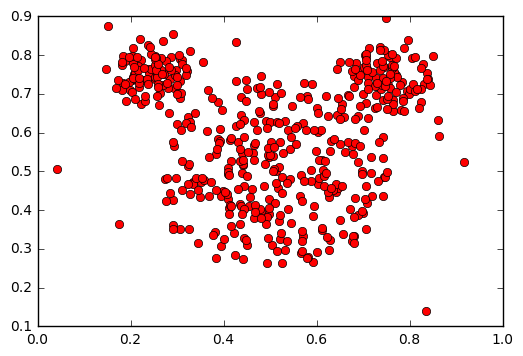

In [23]:
plt.plot(mouse_data.values[:,0], mouse_data.values[:,1],  'ro')
plt.show()

Concernant le plan d'étude de données, on suppose ici que la position des outliers n'est pas connue à priori. Ainsi, on va réaliser l'apprentissage sur toutes les données, et essayer de détecter les outliers dans cet apprentissage.

<h3>Application de la méthode Isolation Forest</h3>

On commence par appliquer la méthode Isolation forest sur le jeu de données pour détecter les outliers.

In [80]:
isolation_forest = ensemble.IsolationForest(max_samples=150)
isolation_forest.fit(mouse_data)
isolation_forest_predict = isolation_forest.predict(mouse_data)

<h3>Application de la méthode LOF</h3>

On applique ensuite la méthode <kbd>LOF</kbd> (Local Outlier Factor) sur le jeu de données pour détecter les outliers. Ce dernier n'étant pas inclus dans notre distribution, nous utiliserons à la place <kbd>OneClassSVM</kbd>. Différents essais ont été réalisés de manière à optimiser le nombre de points détectés par cette méthode.

In [73]:
svm_predictor = svm.OneClassSVM(nu=0.02, gamma=0.1, kernel="rbf")
svm_predictor.fit(mouse_data)
svm_predictor_predict = svm_predictor.predict(mouse_data)

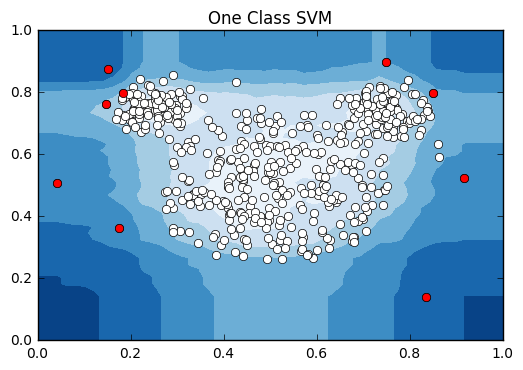

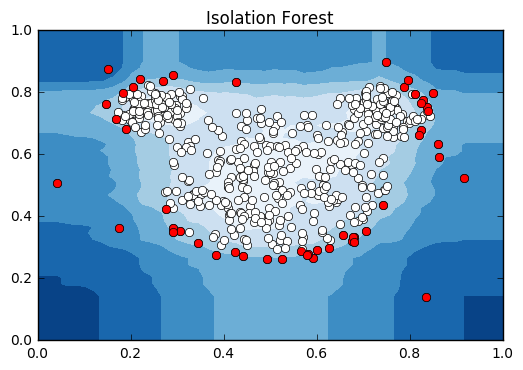

In [82]:
xx, yy = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
Z = isolation_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One Class SVM")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.plot(mouse_data.values[:,0], mouse_data.values[:,1],  'wo')
mouse_data_outliers = mouse_data[svm_predictor_predict == -1]
plt.plot(mouse_data_outliers.values[:,0], mouse_data_outliers.values[:,1],  'ro')
plt.show()

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.plot(mouse_data.values[:,0], mouse_data.values[:,1],  'wo')
mouse_data_outliers_if = mouse_data[isolation_forest_predict == -1]
plt.plot(mouse_data_outliers_if.values[:,0], mouse_data_outliers_if.values[:,1],  'ro')
plt.show()

<h2>III.2. Sur la base de données SMS</h2>

<h3>Préparation de la base de données</h3>

L'objectif est ici de ne conserver que 50% des SMS classifiés en "ham" et de conserver 20 SMS classifiés comme "spam". On obtient ainsi un ensemble de données pour lesquelles les spams sont <i>réellement</i> des outliers, mais qui est un peu plus condensé.

In [9]:
sms_data = pd.read_csv('SMSSpamCollection.data', '\t', header=None)
half_ham = sms_data[sms_data[0] == 'ham']
half_ham = half_ham[0:int(half_ham.shape[0]/2)]
half_ham_test = half_ham[int(half_ham.shape[0]/2):half_ham.shape[0]]
twenty_spam = sms_data[sms_data[0] != 'ham'][0:20]
sms_reshape_data = half_ham.merge(twenty_spam, how='outer')

sms_contents = sms_reshape_data.values[:, 1]
vectorizer = feature_extraction.text.CountVectorizer(max_features=20, stop_words='english')
vectorized_sms_contents = vectorizer.fit_transform(sms_contents).toarray().astype(int)

Y = sms_reshape_data.values[:,0]
Y[Y == 'ham'] = 1
Y[Y == 'spam'] = -1
Y = Y.astype(int)

<h3>Analyse avec Isolation Forest</h3>

Avant d'aller plus loin, on rappelle la forme d'une matrice de confusion :

|TP|FN|
|--|--|
|FP|TN|

On précise aussi avant même tout analyse que dans nos essais, nous n'avons pas réussi à trouver de vrai négatif. Ainsi, aucun des outliers n'est détecté comme spam ici.

In [12]:
isolation_forest = ensemble.IsolationForest(max_samples=150)
isolation_forest.fit(vectorized_sms_contents)
isolation_forest_predict = isolation_forest.predict(vectorized_sms_contents)

print('Matrice de confusion :')
print(metrics.confusion_matrix(Y, isolation_forest_predict, labels=[1, -1]))

print('\nOutliers détectés :')
for i in range(len(isolation_forest_predict)):
    if isolation_forest_predict[i] == -1:
        print(sms_reshape_data.values[i, 1])

Matrice de confusion :
[[2167  245]
 [  20    0]]

Outliers détectés :
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I'm back &amp; we're packing the car now, I'll let you know if there's room
Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
Oops, I'll let you know when my roommate's done
Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy
Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...
U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.
A gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;
Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;
Sorry

Comme précisé, on ne trouve aucun vrai négatif ici, ainsi, les outliers n'ont pas été détectés convenablement par cette méthode.

<h3>Analyse avec LOF</h3>

Le constat est le même que l'analyse avec Isolation Tree concernant les vrais négatifs (aucun remonté).

In [28]:
svm_predictor = svm.OneClassSVM(nu=0.02, gamma=0.1, kernel="rbf")
svm_predictor.fit(vectorized_sms_contents)
svm_predictor_predict = svm_predictor.predict(vectorized_sms_contents)

print('Matrice de confusion :')
print(metrics.confusion_matrix(Y, svm_predictor_predict, labels=[1, -1]))

print('\nOutliers détectés :')
for i in range(len(svm_predictor_predict)):
    if svm_predictor_predict[i] == -1:
        print(sms_reshape_data.values[i, 1])

Matrice de confusion :
[[2362   50]
 [  20    0]]

Outliers détectés :
Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.
Sorry to be a pain. Is it ok if we meet another night? I spent late afternoon in casualty and that means i haven't done any of y stuff42moro and that includes all my time sheets and that. Sorry. 
You are everywhere dirt, on the floor, the windows, even on my shirt. And sometimes when i open my mouth, you are all that comes flowing out. I dream of my world without you, then half my chores are out too. A time of joy for me, lots of tv shows i.ll see. But i guess like all things you just must exist, like rain, hail and mist, and when my time here is done, you and i become one.
Your account has been refilled successfully by INR  &lt;DE

Le constat est le même qu'avec l'utilisation des Isolation Forest. Dans les faits, nous avons essayé de faire varier les deux paramètres <tt>nu</tt> et <tt>gamma</tt>, et les seuls résultats que nous avons obtenus sont soit ceux présentés ici (il y a moyen d'avoir des statistiques meilleures en prenant des valeurs plus faibles pour ces paramètres). Cependant nous n'avons jamais réussi à avoir de résultat avec des vrai négatifs <i>et</i> des vrais positifs. Par exempel, en prenant <tt>nu</tt> très faible (de l'ordre de 0,0000005), on trouve que tous les messages sont des spam, ce qui est encore pire que le résultat ici...

<h3>Visualisation des données</h3>

Comme nous avions gardé les 20 mots les plus fréquents, représenter les données nécessiterait donc de faire un graphe en vingt dimensions...La solution retenue ici est donc de réaliser une ACP pour conserver les deux variables ayant le plus d'information et représenter alors les points dans ce plan.

Nous débutons donc par un calcul d'ACP.

In [14]:
minMaxScaler = preprocessing.MinMaxScaler()
X_minMaxScaled = minMaxScaler.fit_transform(vectorized_sms_contents)
pca = decomposition.PCA()
pca.fit(X_minMaxScaled)
X_PCA_all = pca.transform(X_minMaxScaled)
print('Variance ratio pour les deux premières variables de l\'ACP : {}'.format(sum(pca.explained_variance_ratio_[0:2])))
X_PCA = X_PCA_all[:,range(2)]

Variance ratio pour les deux premières variables de l'ACP : 0.21196566143027712


On remarque alors que les deux variables retenues ne représentent que 21% de l'information totale. Ainsi, on peut mettre en doute la qualité de représentation pour les graphes qui suivront.

Ces derniers sont réalisés en utilisant des outlis similaires à ceux pris pour la base de données <tt>mouse</tt>.

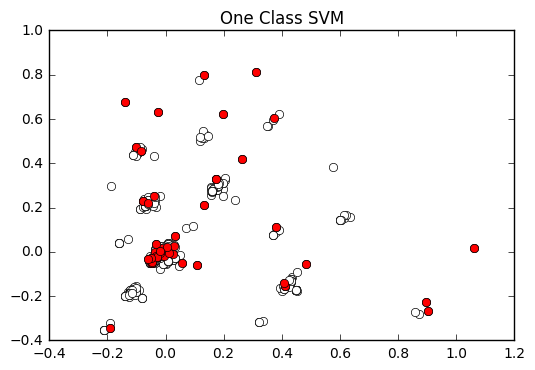

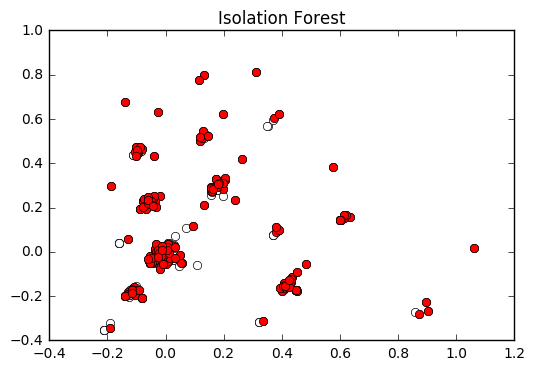

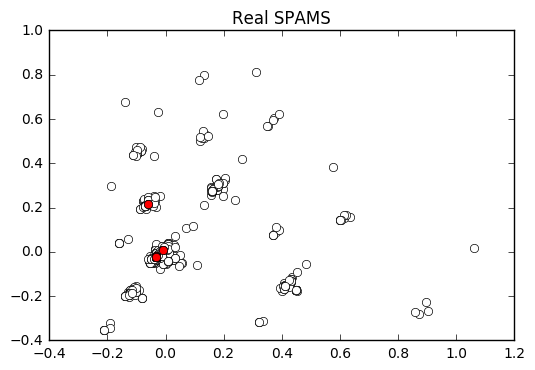

In [15]:
plt.title("One Class SVM")

plt.plot(X_PCA[:,0], X_PCA[:,1],  'wo')
data_outliers = X_PCA[svm_predictor_predict == -1]
plt.plot(data_outliers[:,0], data_outliers[:,1],  'ro')
plt.show()

plt.title("Isolation Forest")

plt.plot(X_PCA[:,0], X_PCA[:,1],  'wo')
data_outliers_if = X_PCA[isolation_forest_predict == -1]
plt.plot(data_outliers_if[:,0], data_outliers_if[:,1],  'ro')
plt.show()

plt.title("Real SPAMS")

plt.plot(X_PCA[:,0], X_PCA[:,1],  'wo')
real_outliers = X_PCA[Y == -1]
plt.plot(real_outliers[:,0], real_outliers[:,1],  'ro')
plt.show()

Des remarques s'imposent sur ces graphes :
<ul>
    <li><b>Présence de grappes : </b>Ces dernières sont dûes au fait que nous avons conservé les vingt termes les plus fréquents, d'où se regroupement des différents SMS par clusters.</li>
    <li><b>Répartition des outliers : </b>On remarque que les outliers calculés (et qui sont faux!) sont répartis de façon plutôt homogène entre les différents clusters.</li>
</ul>
En conclusion, on pourraît donc penser que notre réduction de dimension en prenant les termes les plus fréquents n'était pas la plus intéressante. On essaie donc de réaliser la même opération, mais sans restreindre notre nombre d'estimateurs (le code qui suit est juste une adaptation des codes précédents).

Matrice de confusion :
[[2291  121]
 [  10   10]]
Variance ratio pour les deux premières variables de l'ACP : 0.012991735503118537


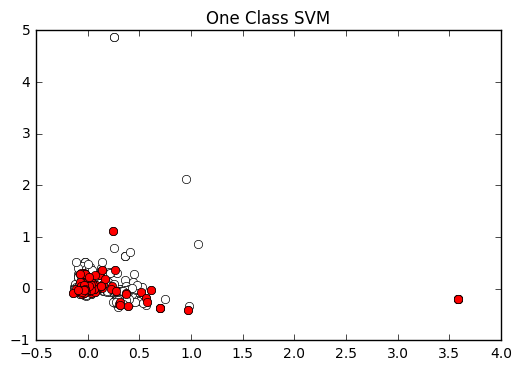

In [38]:
# Récupération des données sans mettre de limite au CountVectorizer
sms_contents = sms_reshape_data.values[:, 1]
vectorizer = feature_extraction.text.CountVectorizer(stop_words='english')
vectorized_sms_contents = vectorizer.fit_transform(sms_contents).toarray().astype(int)

# Prédiction avec le SVM
svm_predictor = svm.OneClassSVM(nu=0.02, gamma=0.1, kernel="rbf")
svm_predictor.fit(vectorized_sms_contents)
svm_predictor_predict = svm_predictor.predict(vectorized_sms_contents)

# Matrice de confusion
print('Matrice de confusion :')
print(metrics.confusion_matrix(Y, svm_predictor_predict, labels=[1, -1]))
        
# Scaling des données et réalisation d'une ACP
minMaxScaler = preprocessing.MinMaxScaler()
X_minMaxScaled = minMaxScaler.fit_transform(vectorized_sms_contents)
pca = decomposition.PCA()
pca.fit(X_minMaxScaled)
X_PCA_all = pca.transform(X_minMaxScaled)
print('Variance ratio pour les deux premières variables de l\'ACP : {}'.format(sum(pca.explained_variance_ratio_[0:2])))
X_PCA = X_PCA_all[:,range(2)]
    
# Affichage des résultats
plt.title("One Class SVM")

plt.plot(X_PCA[:,0], X_PCA[:,1],  'wo')
data_outliers = X_PCA[svm_predictor_predict == -1]
plt.plot(data_outliers[:,0], data_outliers[:,1],  'ro')
plt.show()

On remarque alors qu'en ne limitant pas les variables prises, nous arrivons à remonter des outliers (spams). Ceci se fait alors au prix de l'accuracy.

Ainsi, le choix à faire est de savoir s'il vaut mieux que l'utilisateur se retrouve involontairement avec des spams dans sa boîte mail ou si au contraire il vaut mieux que des mails non spams se retrouvent comme spams mais que l'on puisse détecter plus de spams. Pour le premier scénario, les essais précédents sont plus indiqués. Pour le second scénario (accepter que des hams soient détectés en spams), cette nouvelle option semble plus intéressante.

Quoiqu'il en soit, les résultats ne sont pas encore probants (le rappel des spams est de 50%), et surtout nous nous heurtons à une difficulté de représentation des données, dûe à la dimension du problème.

<h2>III.3. Résumé sur les outliers</h2>

Les meilleurs résultats pour cette détection ont été obtenus en utilisant des SVM, les Isolation Forest semblant moins précise (mais des configurations supplémentaires devraient permettre de les améliorer).

Concernant l'application à l'analyse de texte, on remarque une certaine difficulté à détecter les outliers avec nos méthodes. Ainsi, le résultat et l'algorithme à utiliser devra dépendre fortement du cadre d'application et des attentes clients. Au mieux, nous avons réussi à retrouver 50% des spams, mais ceci a du se faire en "sacrifiant" des SMS non spams...


<h1>Conclusion générale</h1>

Ce travail a été l'occasion de nous familiariser avec les principales méthodes de machine learning et leurs implémentations en Python. Nous avons en particulier pu voir l'influence de leurs paramètres sur les résultats obtenus. Parmis les résultats importants sur ce paramétrage, nous avons mis en avant une stabilisation des performances des Random Forest passé un certain nombre d'arbres générés (les erreurs se moyennent). Les Random Forest nous sont également apparus comme des méthodes robustes et permettant de faire une sélection de variables pertinentes.

Outre les aspects modèles, nous avons pu dans ce travail nous exercer à la préparation des données, que ce soit pour la gestion de données manquantes ou pour le traitement des attributs à valeurs catégorielles.

Dans un autre temps, nous avons pu voir des méthodes qui couplées aux principaux algorithmes vus, nous ont permis de particulièrement bien améliorer leurs résultats. Parmis ces méthodes, l'usage de SVD sur l'exemple des SMS a été particulièrement impressionant, permettant d'obtenir des résultats plus qu'honorables.

Enfin, nous avons dans un dernier temps pu travailler sur la détection d'outliers. Les résultats ont ici été plus mitigés, avec en particulier des difficultés dans l'application au text mining et la détection de spam. Cet aspect pourraît être à retravailler pour améliorer les performances, une première piste ayant été trouvée en fin de sujet.